# MOBAPP STUDIO

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

LIBRIES

In [68]:
#LIB
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re

LOADING DATASET

In [3]:
def load_dataset():
    #READ CSV FILE
    playstore_info = pd.read_csv("googleplaystore.csv")
    #RETURN DATA
    return playstore_info

# DATA STATISTICS

In [4]:
# LoadING DATASET
playstore_info = load_dataset()
# DISPLAY THE  1st 10 rows :)
playstore_info.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [92]:
def print_summarize_dataset(playstore_info):
    # Dataset information.
    print("DATASET INFORMATION:")
    playstore_info.info()
    print()

    # My Dataset shape.
    print("DATASET SHAPE:", playstore_info.shape, "\n")

    # Describing the dataset.
    print("DESCRIBING THE DATASET:")
    print(playstore_info.describe(), "\n")

    # Printing dataset missing values.
    print("MISSING VALUES IN DATASET:")
    print(playstore_info.isnull().sum())

    # The dataset reference.
    print("\nVIEW REFF:\n", playstore_info.head(), "\n")


In [93]:
print_summarize_dataset(playstore_info)

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

DATASET SHAPE: (10841, 13) 

DESCRIBING THE DATASET:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.

# DATA CLEANING AND PRE PROCESSING

In [5]:
def parse_price(x):
    m = re.match(r"\$?(\d+\.?\d*)", x);
    if m:
        return m.group(1)
    else:
        print ("Failed parsing price: " + x)
        return None

    
def get_price(x):
    x = x.strip()
    if x == '0' or x == '':
        return 0
    else:
        parsed_value = parse_price(x)
        if parsed_value != None:
            return float(parsed_value)
        else:
            return None

def parse_size_string(size_string):
    #re.compile(r"([0-9.]+)M")
    m = re.match(r"(\d*\.?\d*) *([Mk])", size_string)
    if m:
        #print("matched size: " + m.group(1) + " " + m.group(2))
        return (m.group(1), m.group(2))
    else:
        #print("failed size: " + size_string)
        return (None, None)

def get_size(x):
    x1, u = parse_size_string(x)
    if x1 != None:
        if u == "M":
            return float(x1)
        elif u == "k" : 
            return .001 * float(x1)
        else: return 0
    else: return None

def clean_dataset(playstore_info):
    # Create a copy of the input DataFrame to avoid modifying the original data
    data = playstore_info.copy()

    # Ensure all values in the 'Size' and 'Installs' columns are treated as strings for cleaning
    data['Size'] = data['Size'].astype(str)
    data['Installs'] = data['Installs'].astype(str)

    # Clean the 'Size' column by extracting numeric values and converting to megabytes
    data['Size'] = data['Size'].apply(get_size)

    # Filter out rows where 'Installs' is not equal to 'Free'
    data = data[data['Installs'] != 'Free']

    # Clean the 'Installs' column by removing '+' and ',' characters and converting to integers
    data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(int)
    
    # converting Price field type to float in $:
    data['Price'] = data['Price'].astype(str)
    data['Price'] = data['Price'].apply(get_price)

    # Convert the 'Reviews' column to integers
    data['Reviews'] = data['Reviews'].astype(int)

    # Filter out rows where 'Android Ver' is not NaN
    data = data.dropna(subset=['Android Ver'])

    return data


In [6]:
gp_play_df = clean_dataset(playstore_info)

gp_play_df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# ANALYSING DATA

In [96]:
def print_histograms(playstore_info):
    # Set a color palette for the plots
    sns.set_palette("pastel")

    # Get the top 10 categories , top 10 categories = TTC
    TTC = gp_play_df['Category'].value_counts().head(10)  
    
    #print(TTC)

    #color map for the pie chart and bar chart
    colors = plt.cm.Paired(range(len(TTC)))

    # Create subplots figsize
    fig, his_axes = plt.subplots(2, 3, figsize=(24, 16))  # Increased figsize for the entire figure

    # Count plot for app categories
    sns.countplot(data=gp_play_df, x='Category', order=TTC.index, palette=colors, ax=his_axes[0, 0])
    his_axes[0, 0].set_ylabel("Number of Apps")
    his_axes[0, 0].set_title("App Count by Category", size=20, fontweight='bold')  # Bold title
    his_axes[0, 0].tick_params(axis='x', rotation=90)

    # Pie chart for category distribution
    his_axes[0, 1].pie(TTC, labels=TTC.index, autopct='%1.1f%%', colors=colors, startangle=140)
    his_axes[0, 1].set_title("Category Distribution (Pie Chart)", size=20, fontweight='bold')  # Bold title

    # Bar chart for category distribution
    sns.barplot(x=TTC.values, y=TTC.index, palette=colors, ax=his_axes[0, 2])
    his_axes[0, 2].set_title("Category Distribution (Bar Chart)", size=20, fontweight='bold')  # Bold title
    his_axes[0, 2].grid(axis="x", linestyle="--", alpha=0.7)

    # Distribution of App Size as a bar plot
    app_size_counts = gp_play_df['Size'].value_counts().head(10)  # Example: Display the top 10 app sizes
    sns.barplot(x=app_size_counts.values, y=app_size_counts.index, palette='Blues_r', ax=his_axes[1, 0])  # Use a different palette
    his_axes[1, 0].set_xlabel("Frequency")
    his_axes[1, 0].set_ylabel("App Size (MB)")
    his_axes[1, 0].set_title("Distribution of App Size (Top 10)", size=20, fontweight='bold')  # Bold title

    # Distribution of Installs 
    sns.histplot(gp_play_df['Installs'], bins=50, kde=True, color='salmon', ax=his_axes[1, 1])  # Increase the number of bins
    his_axes[1, 1].set_xlabel("Number of Installs")
    his_axes[1, 1].set_ylabel("Frequency")
    his_axes[1, 1].set_title("Distribution of Installs", size=20, fontweight='bold')  # Bold title

    # Distribution of Price as a bar plot
    app_price_counts = gp_play_df['Price'].value_counts().head(10)  #Display the top 10 price points
    sns.barplot(x=app_price_counts.index, y=app_price_counts.values, palette='YlOrBr_r', ax=his_axes[1, 2])  # Use a different palette
    his_axes[1, 2].set_xlabel("Price ($)")
    his_axes[1, 2].set_ylabel("Frequency")
    his_axes[1, 2].set_title("Distribution of Price (Top 10)", size=20, fontweight='bold')  # Bold title
    #print(app_price_counts)

    # Adjust spacing between subplots
    plt.tight_layout(pad=3)

    # Show the plots
    plt.show()


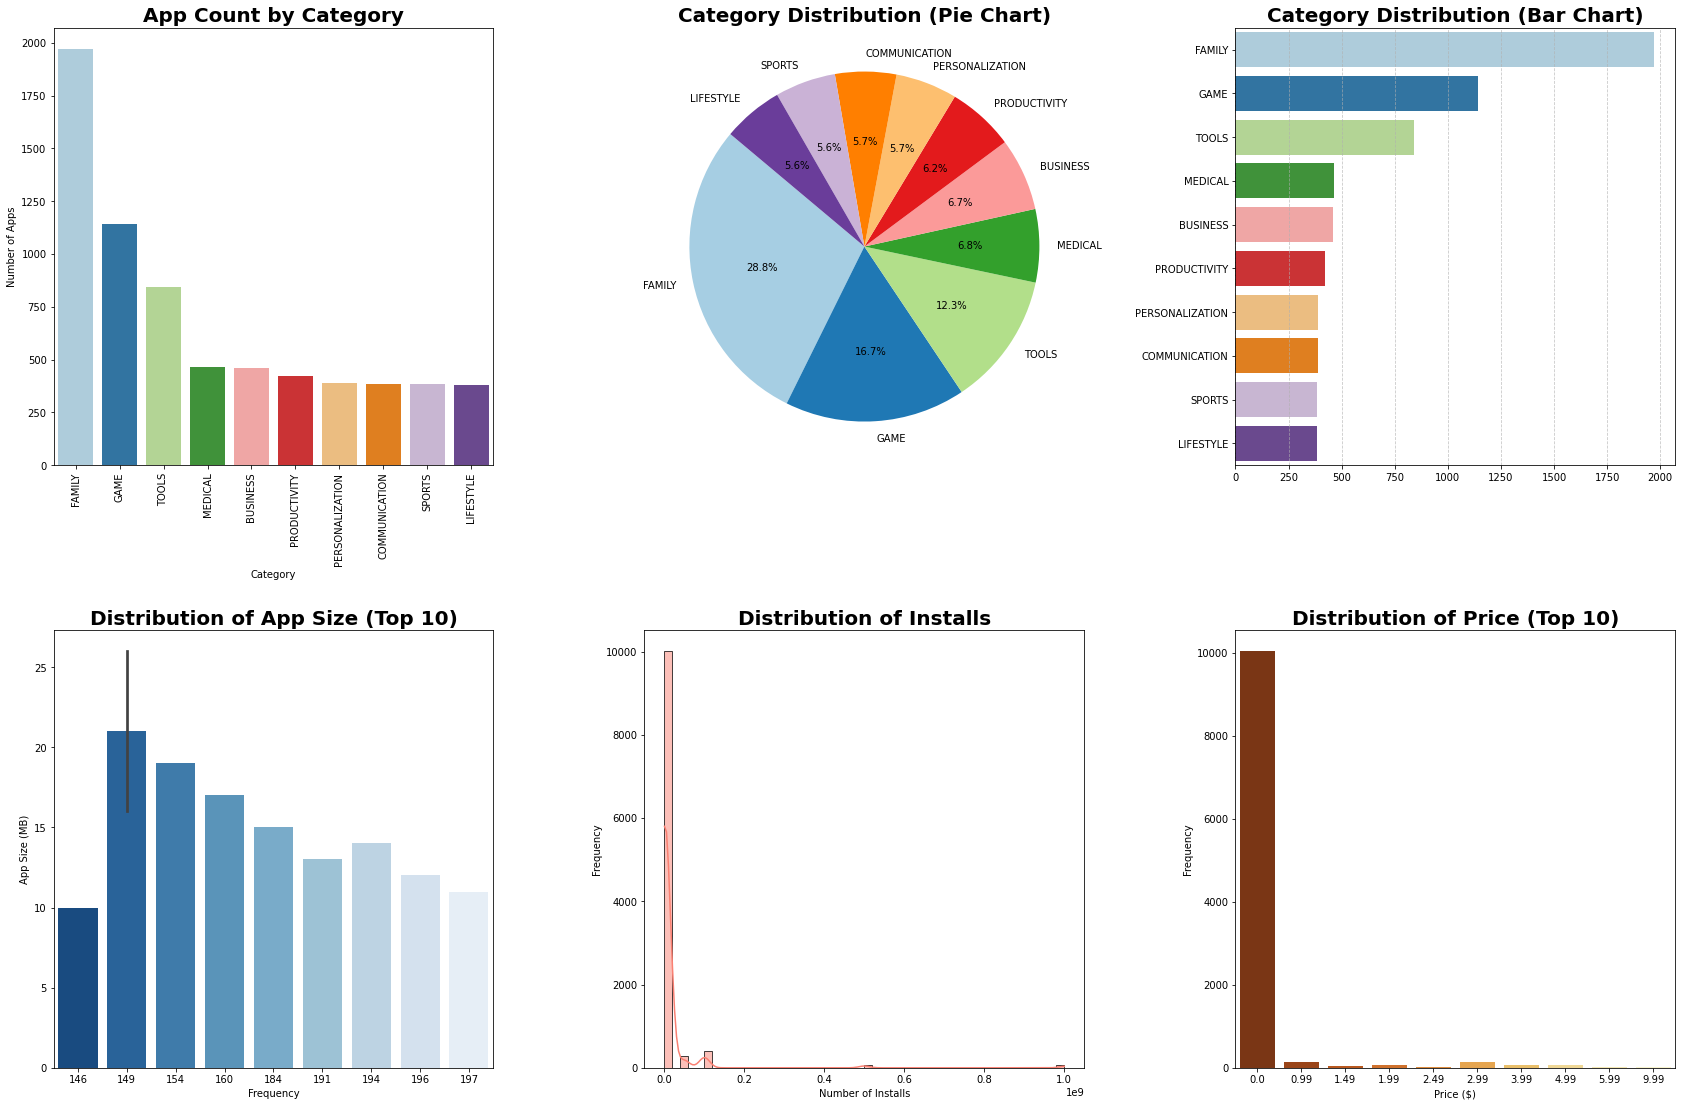

In [97]:
# yeh!!! print all plots :)
print_histograms(gp_play_df)

In [98]:
#correlation matrix
def compute_correlations_matrix(playstore_info):
    # Calculate the correlation matrix
    correlation_matrix = gp_play_df.corr()
    
    # Print correlation matrix
    print(correlation_matrix)


In [99]:
# Cal
compute_correlations_matrix(gp_play_df)

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.068161  0.083839  0.051377 -0.021901
Reviews   0.068161  1.000000  0.238207  0.643120 -0.009668
Size      0.083839  0.238207  1.000000  0.164774 -0.023012
Installs  0.051377  0.643120  0.164774  1.000000 -0.011690
Price    -0.021901 -0.009668 -0.023012 -0.011690  1.000000


In [100]:
def print_scatter_matrix(data):
    sns.pairplot(data, diag_kind='kde', markers='o')
    plt.show()

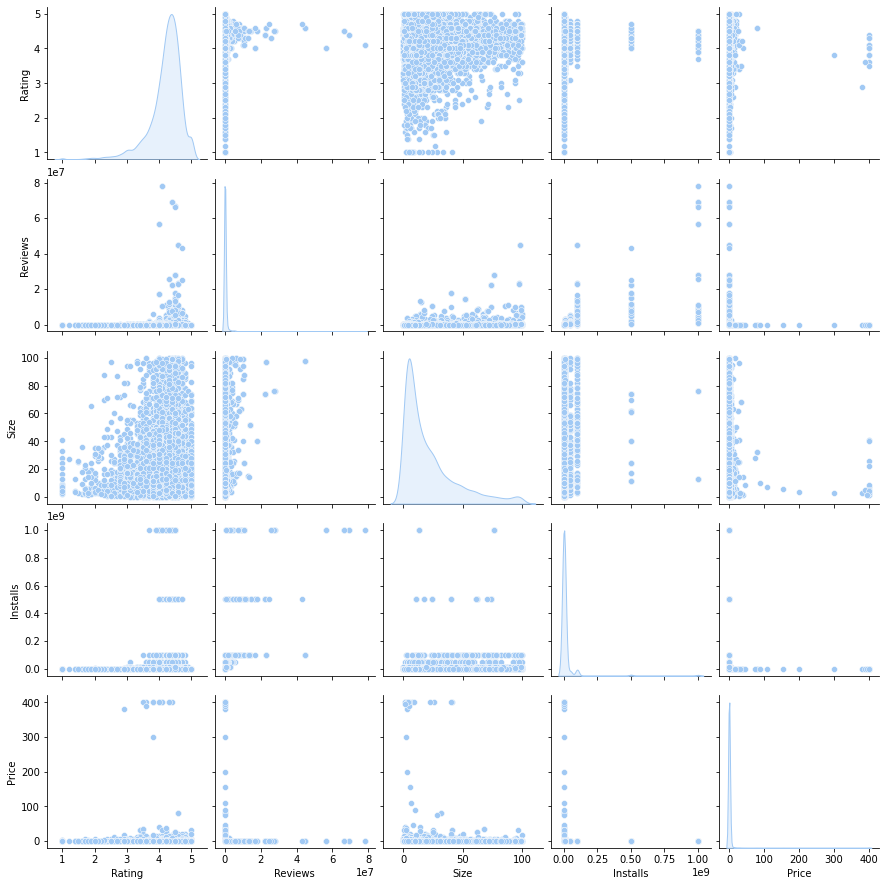

In [101]:
#cleaned_playstore_info = clean_dataset(playstore_info)
cleaned_playstore_info = gp_play_df
print_scatter_matrix(cleaned_playstore_info)

# Most Popular paid App Of Family Category

In [63]:
def plot_poppaid_apps_familycat(playstore_info):
    # Filter the dataset for Family category and Paid apps using .loc
    family_paid_apps = playstore_info.loc[(playstore_info['Category'] == 'FAMILY') & (playstore_info['Type'] == 'Paid')]
    # Create a copy of the filtered DataFrame to avoid modifying the original
    family_paid_apps = family_paid_apps.copy()
    # Convert 'Installs' to integers and update it using .loc
    family_paid_apps.loc[:, 'Installs'] = family_paid_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)
    # Sort the DataFrame by the number of installs in descending order to find the most popular apps
    popular_apps = family_paid_apps.sort_values(by='Installs', ascending=False)
    # Create a custom color palette for the bars
    custom_palette = sns.color_palette("coolwarm", len(popular_apps))
    # Create a bar plot for the top 15 most popular paid apps in the Family category based on the number of installs
    plt.figure(figsize=(12, 10))  # Increase the height of the plot for better visualization
    ax = sns.barplot(data=popular_apps.head(15), x='Installs', y='App', palette=custom_palette)
    plt.xlabel('Number of Installs (in Millions)')
    plt.ylabel('App')
    plt.title('Top 15 Most Popular Paid Apps in Family Category', fontsize=16)

    # set custom tick positions and labels for the x-axis
    custom_ticks = [0, 500000, 1000000, 1500000, 2000000]
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels([f'{tick / 1000000}M' for tick in custom_ticks])
    plt.grid(axis='x', linestyle='--', alpha=0.7);

    plt.show()


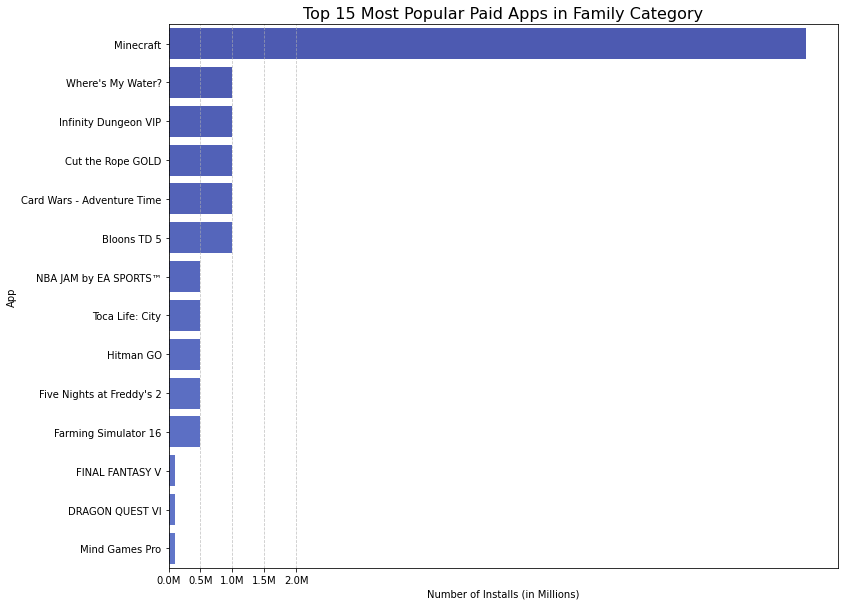

In [64]:
plot_poppaid_apps_familycat(playstore_info)

# Popular Genres According To The Number Of Installations From Faid Family

In [99]:
def popular_installgenre(playstore_info):
    # Filter the dataset for Family category and Paid apps
    family_paid_apps = playstore_info[(playstore_info['Category'] == 'FAMILY') & (playstore_info['Type'] == 'Paid')]
    
    # Clean and convert the 'Installs' column to numeric format
    family_paid_apps.loc[:, 'Installs'] = family_paid_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)
    
    # Group by Genres and sum Installs
    genre_installs = family_paid_apps.groupby('Genres')['Installs'].sum().reset_index()
    
    # Sort the genres by total installs in de order
    sorted_genres_by_installs = genre_installs.sort_values('Installs', ascending=False)
    
    # Select the top 10 genres
    top_10_genres = sorted_genres_by_installs.head(10)
    
    #total installs for other genres
    other_installs = sorted_genres_by_installs[10:]['Installs'].sum()
    
    # Create series
    top_10_genres_series = top_10_genres.set_index('Genres')['Installs']
    genre_distribution = pd.concat([top_10_genres_series, pd.Series([other_installs], index=['Others'])])
    
    # chart with enhanced features
    plt.figure(figsize=(12, 10))  # Increase the size
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Add explosion effect to the slices
    shadow_colors = sns.color_palette('pastel')  # Define shadow colors
    
    patches, texts, autotexts = plt.pie(genre_distribution, 
                                        labels=genre_distribution.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90, 
                                        explode=explode,  # Apply the explosion effect
                                        colors=sns.color_palette('pastel'),
                                        shadow=True,  # Add shadows
                                        wedgeprops={'edgecolor': 'black'},  # Add black edges to slices
                                       )
    
    plt.axis('equal')  # aspect ratio .
    plt.title('Most Popular Genres in Family Category for Paid Apps', fontsize=16)
    
    #legend handler
    legend_labels = genre_distribution.index
    legend_colors = sns.color_palette('pastel')
    legend_percentages = [f'{percentage:.1f} %' for percentage in genre_distribution]
    
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{label}: {percentage}') for label, color, percentage in zip(legend_labels, legend_colors, legend_percentages)]
    
    # Adjust legend location and spacing
    plt.legend(handles=custom_legend, title='Genre and Percentage', loc='upper left', bbox_to_anchor=(1, 1), labelspacing=0.8)
    plt.show()


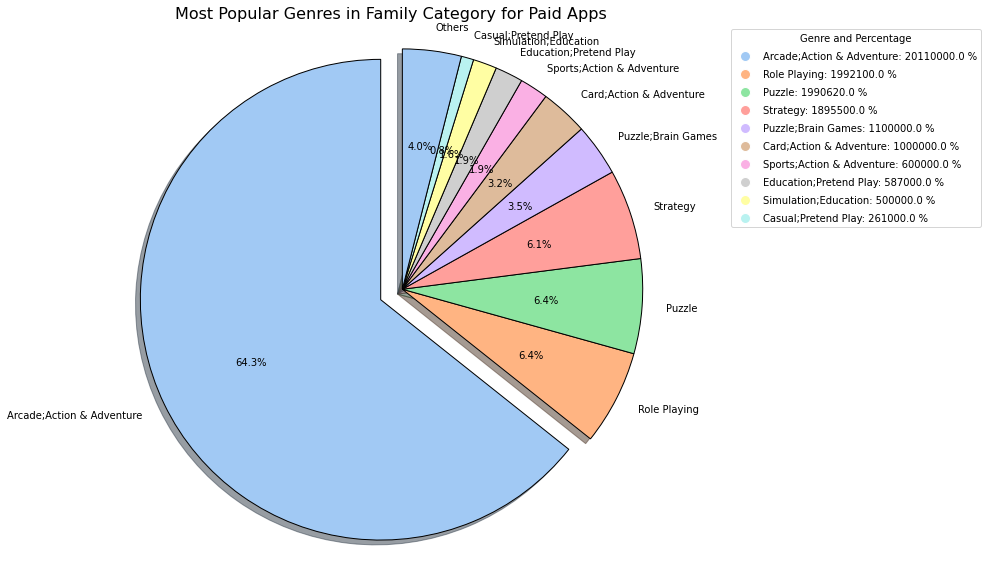

In [100]:
popular_installgenre(playstore_info)

# arrays with number of installs per categories

In [118]:
def installs_per_catarray(cleaned_data):
    # Group and sum by 'Category'
    category_installs = cleaned_data.groupby('Category')['Installs'].sum()   
    # Sort descending order
    sorted_installs = category_installs.sort_values(ascending=False)    
    # Apply formatting
    formatted_installs = sorted_installs.apply(lambda x: '{:,.0f}'.format(x))
    
    return formatted_installs

# Cal
result = installs_per_catarray(gp_play_df)
print(result)


Category
GAME                   35,086,024,415
COMMUNICATION          32,647,276,251
PRODUCTIVITY           14,176,091,369
SOCIAL                 14,069,867,902
TOOLS                  11,452,771,915
FAMILY                 10,258,263,505
PHOTOGRAPHY            10,088,247,655
NEWS_AND_MAGAZINES      7,496,317,760
TRAVEL_AND_LOCAL        6,868,887,146
VIDEO_PLAYERS           6,222,002,720
SHOPPING                3,247,848,785
ENTERTAINMENT           2,869,160,000
PERSONALIZATION         2,325,483,782
BOOKS_AND_REFERENCE     1,921,469,576
SPORTS                  1,751,174,498
HEALTH_AND_FITNESS      1,583,072,512
BUSINESS                1,001,914,865
FINANCE                   876,648,734
EDUCATION                 871,452,000
MAPS_AND_NAVIGATION       724,281,890
LIFESTYLE                 537,643,539
WEATHER                   426,100,520
FOOD_AND_DRINK            273,898,751
DATING                    264,310,807
HOUSE_AND_HOME            168,712,461
ART_AND_DESIGN            124,338,100
LIB

# number of installation per category

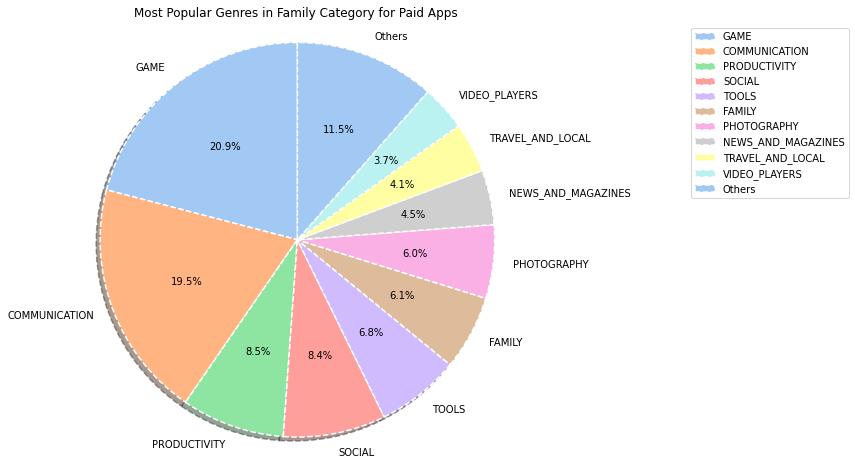

In [130]:

def install_by_categories(cleaned_data):
    category_installs = cleaned_data.groupby('Category')['Installs'].sum()
    sorted_installs = category_installs.sort_values(ascending=False)
    top_categories = sorted_installs.head(10)
    
    #sum for the 'Others' category
    other_installs = sorted_installs[10:].sum()
    final_series = pd.concat([top_categories, pd.Series([other_installs], index=['Others'])])    
    #color palette
    colors = sns.color_palette('pastel')
    
    #shadows and background :)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pie(final_series, labels=final_series.index, autopct='%1.1f%%', startangle=90, colors=colors,
           wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'linestyle': 'dashed'}, shadow=True)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Most Popular Genres in Family Category for Paid Apps', fontsize=12)
    
    # Add a legend
    ax.legend(final_series.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_facecolor('#f0f0f0')  # background color :)
     
    plt.show()

# Call
install_by_categories(gp_play_df)


# a bar with the mean price per category

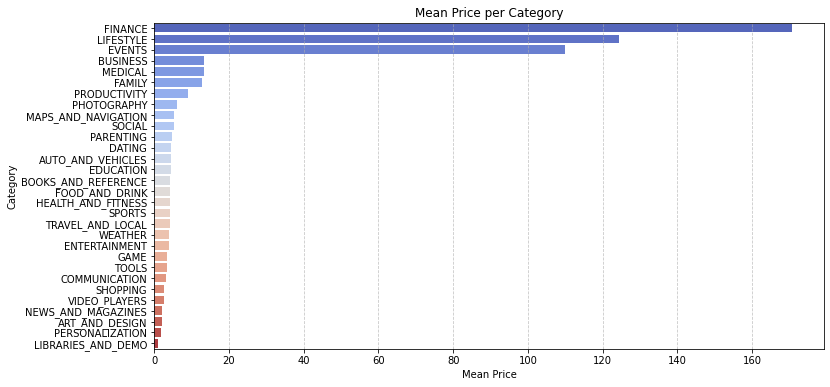

In [133]:
def plt_mean_price_cat(cleaned_data):
    paid = cleaned_data[cleaned_data['Type'] == 'Paid']
    avg_price_per_cat = paid.groupby('Category')['Price'].mean()
    sorted_cat_prices = avg_price_per_cat.sort_values(ascending=False)
    
    # Define a custom color palette
    custom_palette = sns.color_palette("coolwarm", len(sorted_cat_prices))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(y=sorted_cat_prices.index, x=sorted_cat_prices.values, palette=custom_palette)
    
    plt.xlabel('Mean Price')
    plt.ylabel('Category')
    plt.title('Mean Price per Category')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Call the updated function
plt_mean_price_cat(gp_play_df)


# MOST PRICED BY CATEGORIES 

In [102]:
def find_most_expensive_apps(df, num_apps=60):
    paid_apps_df = df[df['Price'] > 0]
    sorted_apps_df = paid_apps_df.sort_values('Price', ascending=False)
    top_apps_df = sorted_apps_df[['Category', 'App', 'Price']].head(num_apps)
    return top_apps_df

In [103]:
top_apps_info = find_most_expensive_apps(cleaned_playstore_info)
#print(top_apps_info)
top_apps_info

,Category,App,Price
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5373,FINANCE,I AM RICH PRO PLUS,399.99
5359,FINANCE,I am rich(premium),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5364,FINANCE,I am rich (Most expensive app),399.99
5362,FAMILY,I Am Rich Pro,399.99
5356,FINANCE,I Am Rich Premium,399.99
4197,FAMILY,most expensive app (H),399.99


In [135]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User rawling_m connection: OK


<MY_MOBAPP_STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MOBAPP STUDIO 

 Status             SUCCESS          
 Execution Runtime  6.444740         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PRI